## TP MACHINE LEARNING: Données Vowel

### 1. Data Vowel: 

In [2]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
%matplotlib inline

import pandas as pd
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

### La première étape à faire est d'importer les données d'entrainements et tests.

In [3]:
train=pd.read_csv('vowel.train.csv', sep=',',index_col=0)
train.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-3.639,0.418,-0.670,1.779,-0.168,1.627,-0.388,0.529,-0.874,-0.814
2,2,-3.327,0.496,-0.694,1.365,-0.265,1.933,-0.363,0.510,-0.621,-0.488
3,3,-2.120,0.894,-1.576,0.147,-0.707,1.559,-0.579,0.676,-0.809,-0.049
4,4,-2.287,1.809,-1.498,1.012,-1.053,1.060,-0.567,0.235,-0.091,-0.795
5,5,-2.598,1.938,-0.846,1.062,-1.633,0.764,0.394,-0.150,0.277,-0.396


In [4]:
test=pd.read_csv('vowel.test.csv', sep=',',index_col=0)
test.head()

,y,x.1,x.2,x.3,x.4,x.5,x.6,x.7,x.8,x.9,x.10
row.names,,,,,,,,,,,
1,1,-1.149,-0.904,-1.988,0.739,-0.060,1.206,0.864,1.196,-0.300,-0.467
2,2,-2.613,-0.092,-0.540,0.484,0.389,1.741,0.198,0.257,-0.375,-0.604
3,3,-2.505,0.632,-0.593,0.304,0.496,0.824,-0.162,0.181,-0.363,-0.764
4,4,-1.768,1.769,-1.142,-0.739,-0.086,0.120,-0.230,0.217,-0.009,-0.279
5,5,-2.671,3.155,-0.514,0.133,-0.964,0.234,-0.071,1.192,0.254,-0.471


### ensuite voyons la dimension et le type de nos données avec la fonction shape et type

In [5]:
print(train.shape)
print(test.shape)
print(type(train))

(528, 11)
(462, 11)
<class 'pandas.core.frame.DataFrame'>


### on finit par definir les matrices X_train,X_test et les vecteurs y_train,y_test

In [6]:
X_train=train.iloc[:,1:].values
y_train=train.iloc[:,0].values
X_test=test.iloc[:,1:].values
y_test=test.iloc[:,0].values

### On verifie la taille des matrices et des vecteurs definies ci-dessus

In [7]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(528, 10)
(462, 10)
(528,)
(462,)


### les differents valeurs de nos données cibles sont:

In [8]:
np.unique(train['y'])

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

### d'aprés les données cibles c'est un probleme de classification multiclass avec 11 classes ensuite éssayons de visualiser nos données cibles grâce à un histogramme.

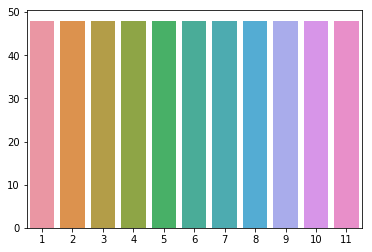

In [9]:
import seaborn as sns
sns.barplot(np.unique(train['y']),train.groupby('y').count().values[:,0])

## 1.Naive Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
#fitting classifier to the training set
gnb_fit=gnb.fit(X_train,y_train)
#predicting the Test set result
y_pred_test=gnb_fit.predict(X_test)
y_pred_train=gnb_fit.predict(X_train)

In [11]:
from sklearn.metrics import accuracy_score
print("le score sur le test est ",("%.3f" % accuracy_score(y_pred_test,y_test)))
print("le score sur le train est ",("%.3f" % accuracy_score(y_pred_train,y_train)))

le score sur le test est  0.461
le score sur le train est  0.720


## 2.LDA

In [12]:
lda=LinearDiscriminantAnalysis()
lda_fit=lda.fit(X_train,y_train)
y_pred_test=lda_fit.predict(X_test)
y_pred_train=lda_fit.predict(X_train)

In [13]:
from sklearn.metrics import accuracy_score
print("le score sur le test est ",("%.3f" % accuracy_score(y_pred_test,y_test)))
print("le score sur le train est ",("%.3f" % accuracy_score(y_pred_train,y_train)))

le score sur le test est  0.444
le score sur le train est  0.684


### .comparaison entre la méthode LDA et Naive Bayes
### On constate que la methode Naive Bayes est beaucoup plus precis que la méthode LDA vu que son score  de test et de train est respectivement 46% et 72% tandisque celle de la méthode LDA est de 44% et 68%. On s'attendait à cela car la LDA est une méthode linéairement  qui marche trés bien avec des points linéairement séparable.

## 3.QDA

In [14]:
qda=QuadraticDiscriminantAnalysis()
qda_fit=qda.fit(X_train,y_train)
y_pred_test=qda_fit.predict(X_test)
y_pred_train=qda_fit.predict(X_train)

In [15]:
from sklearn.metrics import accuracy_score
print("le score sur le test est ",("%.3f" % accuracy_score(y_pred_test,y_test)))
print("le score sur le train est ",("%.3f" % accuracy_score(y_pred_train,y_train)))

le score sur le test est  0.472
le score sur le train est  0.989


## Comparaison entre QDA et NAIVE BAYES:
### Conclusion: d'aprés l'accuracy des deux methodes la QDA est la meilleure méthode vu que sa précision sur le test est de 47%  et néttement supérieur à celle de Naive Bayes qui est de 46%. mais aussi on a une précision importante sur le train qui est de 98%.

## 4.Knn

### Utilisons l'algo k-NN pour différents k et comparons ses performances

In [16]:
from sklearn import neighbors
knn=neighbors.KNeighborsClassifier(n_neighbors=6)
knn_fit=knn.fit(X_train, y_train)
knn_fit

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [17]:
acc_train=[]
acc_test=[]
for k in np.arange(1,50):
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    knn_fit=knn.fit(X=X_train,y=y_train)
    acc_train.append(accuracy_score(knn_fit.predict(X_train),y_train))
    acc_test.append(accuracy_score(knn_fit.predict(X_test),y_test))

In [18]:
k_hat=np.argmax(acc_test)
print("Le score sur le train est:",("%.3f" % acc_train[k_hat]))
print("Le score sur le test est:",("%.3f" % acc_test[k_hat]))

Le score sur le train est: 0.977
Le score sur le test est: 0.608


In [19]:
k_hat


5

NB:on voit que k_hat est à la 5éme position de notre tablau acc_test donc le nombre de voisin est bien égale à 6.

### k=k_hat+1, est le nombre de voisins qui maximise l'accuracy_score sur les données test qui est égale à 6. Cela veut dire en d'autres termes, un nouveau point de donnée est étiqueté avec une majorité des 6 points les plus proches.

### On le voit clairement dans le graphe ci-dessous

### le graphe suivant nous permet de comparer la précision du modèle k-nn en fonction du nombre de voisins(k).

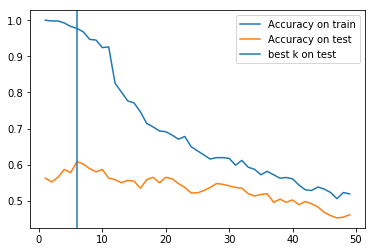

In [20]:
plt.plot(np.arange(1,50),acc_train,label='Accuracy on train')
plt.plot(np.arange(1,50),acc_test,label='Accuracy on test')
plt.axvline(np.arange(1,50)[k_hat],label='best k on test')
plt.legend()

### Analyses et interprétations du graphe ci-dessus:
### le graphe ci-dessus représente l'accuracy sur les données d'entrainements et test en fonction du nombre de voisin.

### on remarque que lorsque k devient trés grand l'accuracy(train,test) diminue jusqu'à atteindre 0.5 pour train et environ 0.20 pour le test donc on peut dire que le modéle a sous-appris(Underfitting).

### lorsque k est petit(k<6) l'accuracy devient grand pour le train jusqu'à atteindre 0.95 donc on peut dire que le modèle a sur-appris(Overfitting).

## 5. Cross_Validation via sklearn
On va utiliser la cross-validation pour la méthodes(Knn)

# i) Knn
pour le nombre de voisin on a choisi k=k_hat=5.

### Afin de former et de tester notre modèle à l'aide de la cross-validation, nous importons la fonction 'cross_val_score' avec une valeur de cv=5.
### 'cross_val_score' prend notre modèle k-nn et nos données en tant que paramètres. Ensuite, il divise nos données en 5 groupes, les ajuste et les note 5 fois, en enregistrant le score de précision dans un tableau à chaque fois et notre précision finale sera la moyenne de notre tableau . Le code suivant illustre notre explication.

In [57]:
from sklearn.model_selection import cross_val_score
knn=neighbors.KNeighborsClassifier(n_neighbors=5)
scores_train = cross_val_score(knn, X_train, y_train, cv=5)
scores_test = cross_val_score(knn, X_test, y_test, cv=5)
print("le score des 5 cross-validation pour le train est:")
print(scores_train)
print("Le score moyen des 5 cv sur le train est:",("%.3f" % scores_train.mean()))
print("le score des 5 cross-validation pour le test est:")
print(scores_test)
print("Le score moyen des 5 cv sur le test est:",("%.3f" % scores_test.mean()))

le score des 5 cross-validation pour le train est:
[0.59090909 0.66363636 0.72727273 0.5959596  0.50505051]
Le score moyen des 5 cv sur le train est: 0.617
le score des 5 cross-validation pour le test est:
[0.6969697  0.66666667 0.68181818 0.71590909 0.63636364]
Le score moyen des 5 cv sur le test est: 0.680



### La validation croisée offre à notre modèle une possibilité de tester plusieurs fractionnements afin que nous puissions avoir une meilleure idée de la performance du modèle. 
### En utilisant la validation croisée, notre score moyen sur le test est d'environ 68%. Il s'agit d'une représentation plus précise de la performance de notre modèle sur nos données comparé à la précision du k-nn sans cv avec k=6 où on a une précision de 60% sur les tests. 

### Par contre sur les données train on a une précision environ de 97% sans CV(cross_validation) et 61.7% avec CV.

### essayons de determiner le nombre de voisins en utilisant la cv pour differents k et cv=5.


In [32]:
scores_train=[]
scores_test=[]

for k in range(1,50):
    
    from sklearn.model_selection import cross_val_score
    knn=neighbors.KNeighborsClassifier(n_neighbors=k)
    scores_train.append(cross_val_score(knn, X_train, y_train, cv=5))
    scores_test.append(cross_val_score(knn, X_test, y_test, cv=5))


In [55]:
print("le score des 5 cv de test pour les 10 premiers k est:")
print(scores_test[0:10])

le score des 5 cv de test pour les 10 premiers k est:
[array([0.70707071, 0.71717172, 0.59090909, 0.96590909, 0.68181818]), array([0.68686869, 0.68686869, 0.625     , 0.89772727, 0.68181818]), array([0.71717172, 0.65656566, 0.67045455, 0.93181818, 0.63636364]), array([0.68686869, 0.67676768, 0.70454545, 0.76136364, 0.69318182]), array([0.6969697 , 0.66666667, 0.68181818, 0.71590909, 0.63636364]), array([0.66666667, 0.65656566, 0.65909091, 0.71590909, 0.64772727]), array([0.71717172, 0.58585859, 0.63636364, 0.65909091, 0.65909091]), array([0.70707071, 0.56565657, 0.60227273, 0.65909091, 0.67045455]), array([0.68686869, 0.54545455, 0.59090909, 0.625     , 0.61363636]), array([0.67676768, 0.57575758, 0.59090909, 0.64772727, 0.61363636])]


### on stocke le score des tests sur un tableau pour chaque k et le code suivant permet de calculer la moyenne sur le tableau pour différents k

In [49]:
score_mean_test=[]
for k in range(0,49):
    score_mean_test.append(scores_test[k].mean())
print("on affiche les 10 premiers moyennes de notre tableau score_test")
print(score_mean_test[0:10])
    
    

on affiche les 10 premiers moyennes de notre tableau score_test
[0.7325757575757575, 0.7156565656565655, 0.7224747474747474, 0.7045454545454546, 0.6795454545454545, 0.6691919191919192, 0.6515151515151516, 0.6409090909090909, 0.6123737373737373, 0.6209595959595959]


### on va chercher le max de ce tableau

In [50]:
np.argmax(score_mean_test)

0

In [34]:
scores_test[1].mean()

0.7156565656565655

### on trouve que le nombre de voisins qui maximise le score est 1
